In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import imageio
import os
import csv
def show(image):
    # cv2.imwrite('rocks_within_lava.jpg', rocks_within_lava)
    # cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    # cv2.resizeWindow("Image", 500, 600)
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def ishow(image):
    fig, ax = plt.subplots(figsize=(6, 6)) 
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap="tab20b") 
    ax.axis('off') 
    plt.show()

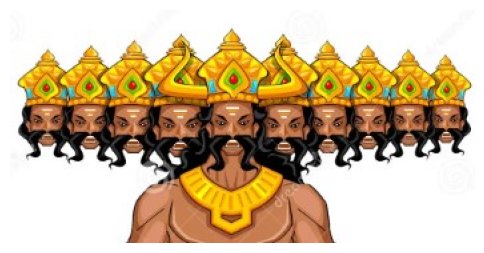

In [3]:
image = cv2.imread('test/r1.jpg')
ishow(image)

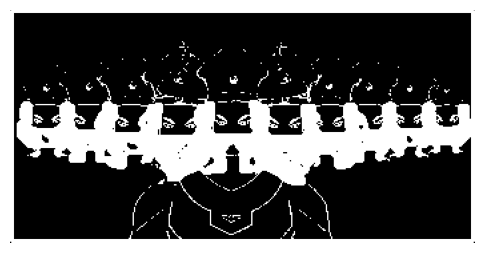

In [23]:
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# show(gray)
# ret, bin_img = cv2.threshold(gray, 250, 255,  cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
_,bin_img = cv2.threshold(gray, 80,255, cv2.THRESH_BINARY_INV)
ishow(bin_img)
# ret, bin_img = cv2.threshold(gray, 79, 255, cv2.THRESH_BINARY_INV) 
# show(bin_img)

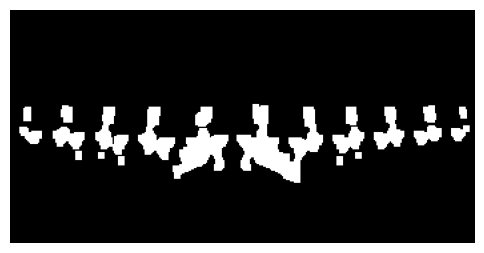

In [14]:
kernel = np.ones((1,1), np.uint8)
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN,kernel, iterations = 10)
sure_bg = cv2.dilate(opening, kernel, iterations=1)
ishow(opening)
show(sure_bg)

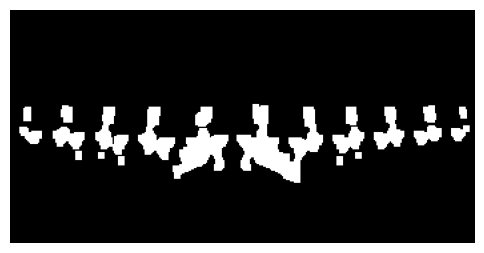

In [6]:
# noise removal 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) 
bin_img = cv2.morphologyEx(bin_img, 
						cv2.MORPH_OPEN, 
						kernel, 
						iterations=1) 
ishow(bin_img) 


In [24]:
# Create subplots with 1 row and 2 columns 
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8)) 
# sure background area 
sure_bg = cv2.dilate(bin_img, kernel, iterations=3) 
show(sure_bg)
# ishow(sure_bg)
# axes[0, 0].set_title('Sure Background') 

# Distance transform 
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3) 
show(dist)
# axes[0, 1].set_title('Distance Transform') 

#foreground area 
ret, sure_fg = cv2.threshold(dist, 0.39 * dist.max(), 255, cv2.THRESH_BINARY) 
sure_fg = sure_fg.astype(np.uint8) 
show(sure_fg) 
# axes[1, 0].set_title('Sure Foreground') 

# unknown area 
unknown = cv2.subtract(sure_bg, sure_fg) 
show(unknown)
# axes[1, 1].set_title('Unknown') 

# show()


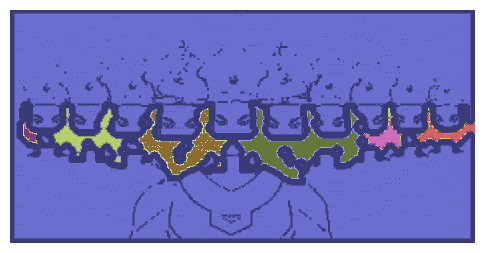

In [25]:
# Marker labelling 
# sure foreground 
ret, markers = cv2.connectedComponents(sure_fg) 

# Add one to all labels so that background is not 0, but 1 
markers += 1
# mark the region of unknown with zero 
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show()


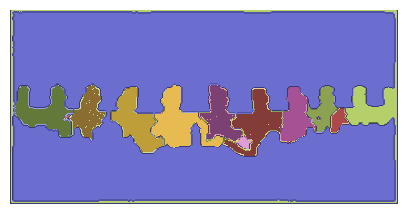

In [31]:
# watershed Algorithm 
img = image
markers = cv2.watershed(img, markers) 

fig, ax = plt.subplots(figsize=(5, 5)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show() 


labels = np.unique(markers) 

coins = [] 
for label in labels[2:]: 

# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background 
	target = np.where(markers == label, 255, 0).astype(np.uint8) 
	
# Perform contour extraction on the created binary image 
	contours, hierarchy = cv2.findContours( 
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE 
	) 
	coins.append(contours[0]) 

# Draw the outline 
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2) 
show(img)


In [95]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(bin_img,cv2.MORPH_OPEN,kernel, iterations = 1)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=10)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L1,5)
ret, sure_fg = cv2.threshold(dist_transform,0.8*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

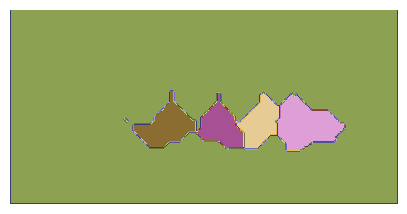

In [96]:
img = image
markers = cv2.watershed(img, markers) 

fig, ax = plt.subplots(figsize=(5, 5)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show() 


labels = np.unique(markers) 

coins = [] 
for label in labels[2:]: 

# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background 
	target = np.where(markers == label, 255, 0).astype(np.uint8) 
	
# Perform contour extraction on the created binary image 
	contours, hierarchy = cv2.findContours( 
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE 
	) 
	coins.append(contours[0]) 

# Draw the outline 
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2) 
show(img)